<a href="https://colab.research.google.com/github/Ryan-Shaik/Computer_Vision/blob/index.edit/PyTorch_Fashion_MNIST_without_Regularization_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import torch.nn.functional as F


In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,),(0.5,))
])


In [ ]:
trainset = torchvision.datasets.FashionMNIST(
    root = "./data",
    train = True,
    transform=transform,
    download = True
)

testset = torchvision.datasets.FashionMNIST(
    root = "./data",
    train = False,
    transform = transform,
    download = True

)

100%|██████████| 26421880/26421880 [00:01<00:00, 18091236.50it/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 331102.40it/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5566441.79it/s] 


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 24370515.79it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



In [ ]:
print(trainset.data.shape)
print(testset.data.shape)

torch.Size([60000, 28, 28])
torch.Size([10000, 28, 28])


In [ ]:
classes = ("T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt","Sneaker", "Bag", "Ankle boot")

In [ ]:
trainloader = torch.utils.data.DataLoader(
    trainset,
    batch_size = 32,
    shuffle = True,
    num_workers = 2


)

testloader = torch.utils.data.DataLoader(
    testset,
    batch_size = 32,
    shuffle = False,
    num_workers = 2

)

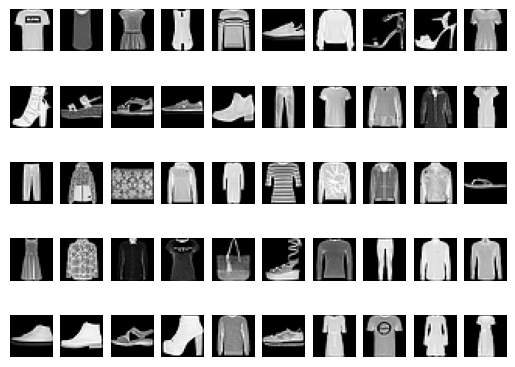

In [ ]:
figure = plt.figure()
num_of_images = 50

for index in range(1, num_of_images +1):
    plt.subplot(5,10, index)
    plt.axis("off")
    plt.imshow(trainset.data[index], cmap = "gray")

<Figure size 640x480 with 0 Axes>

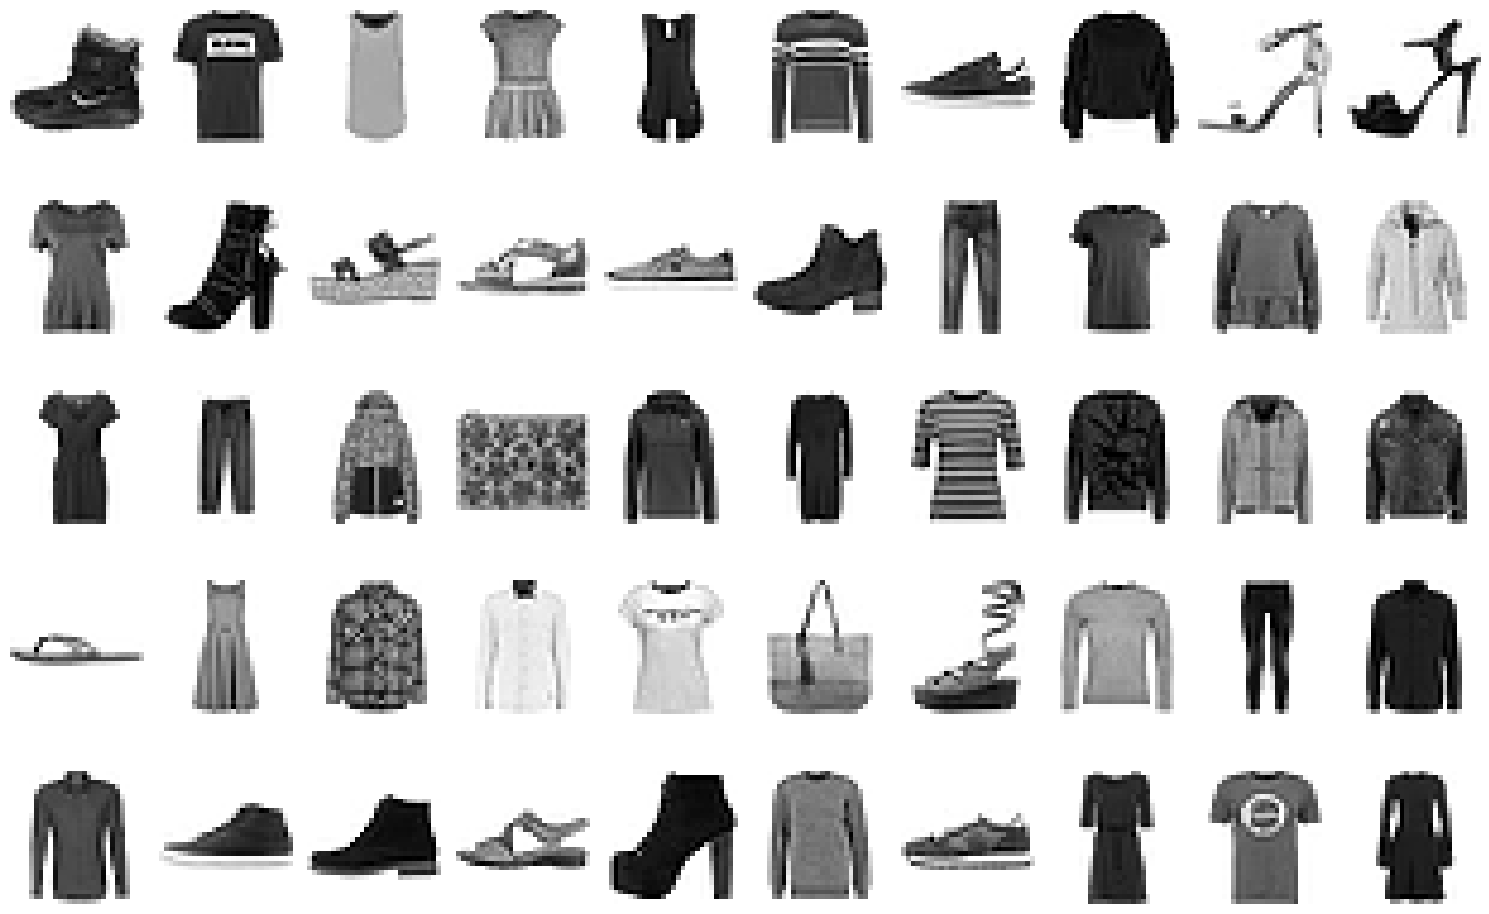

In [ ]:
figure = plt.figure()
num_of_images = 50
fig, axes = plt.subplots(5, 10, figsize=(15, 10))  # Create a 5x10 grid of subplots
axes = axes.flatten()  # Flatten the array for easy iteration

for index in range(num_of_images):
    axes[index].axis("off")
    axes[index].imshow(trainset.data[index], cmap="gray_r")

plt.tight_layout()  # Adjust spacing to prevent overlap
plt.show()

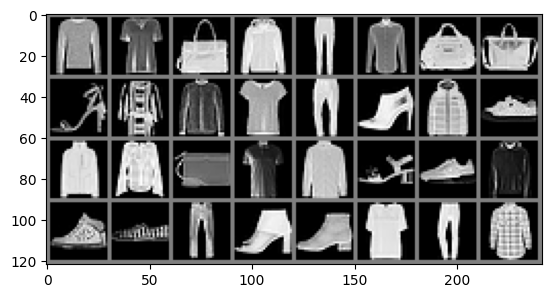

Pullover Shirt Bag   Coat  Trouser Shirt Bag   Bag  


In [ ]:
def imshow(img):
    img = img/2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))
    plt.show()

dataiter = iter(trainloader)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images))

print(' '.join(f'{classes[labels[j]]:5s}' for j in range(8)))

### Building and Training our simple CNN with No Regularization

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1,32,3)
        self.conv2 = nn.Conv2d(32,64,3)
        self.pool = nn.MaxPool2d(2,2)
        self.fc1 = nn.Linear(64 * 12 * 12, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 12 *12)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

net = Net()
net.to(device)


Net(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=9216, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)

### Define our Loss and Optimizer Functions

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr = 0.001, momentum = 0.9 )

### Training Our Model

In [ ]:
epoch_log = []
loss_log = []
accuracy_log = []
epochs = 15

for epoch in range(epochs):
    print(f"Starting Epoch: {epoch + 1}")

    running_loss = 0.0

    # iterate through trainloader
    # Each cycle is a mini batch
    for i, data in enumerate(trainloader,0):
        inputs, labels = data

        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        net.train()
        outputs = net(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        if i % 100 == 90: # Show loss after every 50-mini-batches
            correct = 0 # Initializing variable to hold the count for the correct predictions
            total = 0 # Initializing variable to hold the count of the number of labels iterated


            net.eval()
            # we dont need gradient for validation so wrap in
            # inference_mode to save memory
            with torch.inference_mode():
                for data in testloader:
                    images, labels = data
                    images, labels = images.to(device), labels.to(device)

                    # Forward propagate test batch through out model
                    outputs = net(images)

                    # Get predictions from the max value
                    _, predicted = torch.max(outputs.data, 1)

                    # Keep adding the label size to the total variable
                    total += labels.size(0)
                    # Keep running a total number of prediction predicted correctly
                    correct += (predicted == labels).sum().item()

                accuracy = 100 * correct/total
                epoch_num = epoch + 1
                actual_loss = running_loss / 50
                print(f"Epoch: {epoch_num}, Mini-Batches Completed {(i + 1)}, Loss: {actual_loss:.3f}, Test_accuracy: {accuracy:.3f}")
                running_loss = 0.0

    # Store training stats after each epochs
    epoch_log.append(epoch_num)
    loss_log.append(actual_loss)
    accuracy_log.append(accuracy)



Starting Epoch: 1
Epoch: 1, Mini-Batches Completed 91, Loss: 3.698, Test_accuracy: 62.840
Epoch: 1, Mini-Batches Completed 191, Loss: 1.927, Test_accuracy: 71.460
Epoch: 1, Mini-Batches Completed 291, Loss: 1.506, Test_accuracy: 73.780
Epoch: 1, Mini-Batches Completed 391, Loss: 1.369, Test_accuracy: 75.750
Epoch: 1, Mini-Batches Completed 491, Loss: 1.237, Test_accuracy: 77.420
Epoch: 1, Mini-Batches Completed 591, Loss: 1.259, Test_accuracy: 77.230
Epoch: 1, Mini-Batches Completed 691, Loss: 1.140, Test_accuracy: 77.800
Epoch: 1, Mini-Batches Completed 791, Loss: 1.165, Test_accuracy: 73.120
Epoch: 1, Mini-Batches Completed 891, Loss: 1.092, Test_accuracy: 79.620
Epoch: 1, Mini-Batches Completed 991, Loss: 1.091, Test_accuracy: 78.900
Epoch: 1, Mini-Batches Completed 1091, Loss: 1.122, Test_accuracy: 78.440
Epoch: 1, Mini-Batches Completed 1191, Loss: 1.093, Test_accuracy: 79.400
Epoch: 1, Mini-Batches Completed 1291, Loss: 1.056, Test_accuracy: 79.980
Epoch: 1, Mini-Batches Complete

### Models Accuracy


In [ ]:
correct = 0
total = 0
with torch.inference_mode():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data,1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy =  100 * correct/total
print(f"Accuracy of model after training : {accuracy:.2f}%")

Accuracy of model after training : 91.65%


### Training Plots

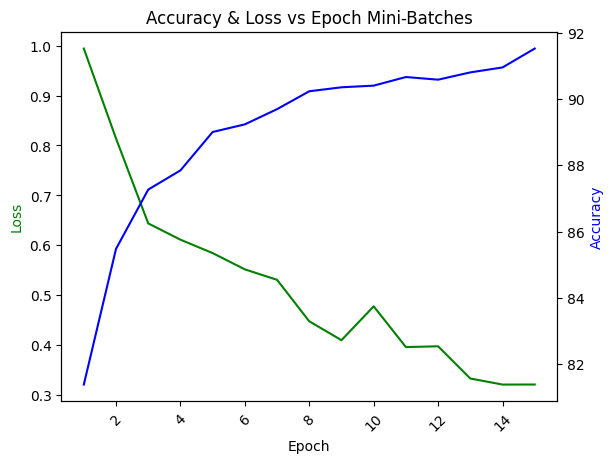

In [ ]:
fig, ax1 = plt.subplots()

plt.title("Accuracy & Loss vs Epoch Mini-Batches")
plt.xticks(rotation=45)

ax2 = ax1.twinx()

ax1.plot(epoch_log, loss_log, "g-", label = "Loss")
ax2.plot(epoch_log, accuracy_log, "b-", label = "Accuracy")

ax1.set_xlabel("Epoch")
ax1.set_ylabel("Loss", color = "g")
ax2.set_ylabel("Accuracy", color = "b")
plt.show();

### Saving Model

In [ ]:
PATH = "./fashion_net.pth"
torch.save(net.state_dict(), PATH)

### Data Augmentation

**How Data Augmentation affects images**

In [ ]:
import PIL

data_aug_transform = transforms.Compose([
    transforms.RandomAffine(degrees=10, translate=(0.05,0.05), shear=5 ),
    transforms.ColorJitter(hue = 0.05, saturation=0.05),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15, interpolation=  PIL.Image.BILINEAR),
    transforms.Grayscale(num_output_channels=1)
])

**Perform the Data Augmentation on a Single Image using the function below to visualize the affect**

In [ ]:
from matplotlib.pyplot import figure, imshow, axis
from matplotlib.image import imread

def showAugmentations(image, augmentations = 6):
    fig = figure()
    for i in range(augmentations):
        a = fig.add_subplot(1, augmentations, i + 1)
        img = data_aug_transform(image)
        imshow(img, cmap = "Greys_r")
        axis("off")

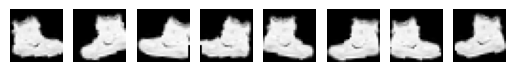

In [ ]:
# Load the first Image from our training data as numpy array
image = trainset.data[0].numpy()

# Convert it to PIL Image format
img_pil = PIL.Image.fromarray(image)

showAugmentations(img_pil,8)